## New York City Taxi & Limousine Commission

In [1]:
import pandas as pd
import numpy as np

import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
data.shape

(22699, 18)

In [6]:
# Checking for null entries
data.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
# Checking for duplicate entries
data.duplicated().sum()

0

In [8]:
# Checking data types
data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [9]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Data Exploration

In [10]:
# Checking the extent of disparity for total amount
total_amt_sort = data['total_amount'].sort_values(ascending=False)
total_amt_sort.head(10)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
Name: total_amount, dtype: float64

In [11]:
# Investigating the total amount less than 1 dollar
total_amt_sort.tail(20)

14283      0.31
19067      0.30
10506      0.00
5722       0.00
4402       0.00
22566      0.00
1646      -3.30
18565     -3.80
314       -3.80
5758      -3.80
5448      -4.30
4423      -4.30
10281     -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
17602     -5.80
20698     -5.80
12944   -120.30
Name: total_amount, dtype: float64

In [12]:
# Converting from object to datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

### Data visualization and Exploratory data analysis (EDA)

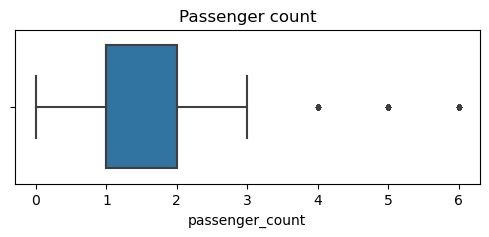

In [13]:
# Checking the distribution of passenger count
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='passenger_count', fliersize=3)
plt.title('Passenger count');

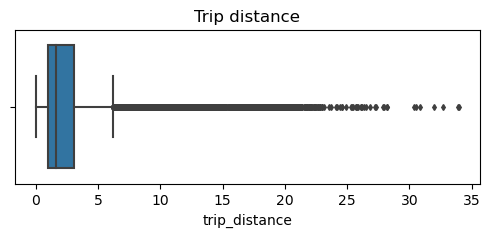

In [14]:
# Checking the distributon of trip distance
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='trip_distance', fliersize=3)
plt.title('Trip distance');

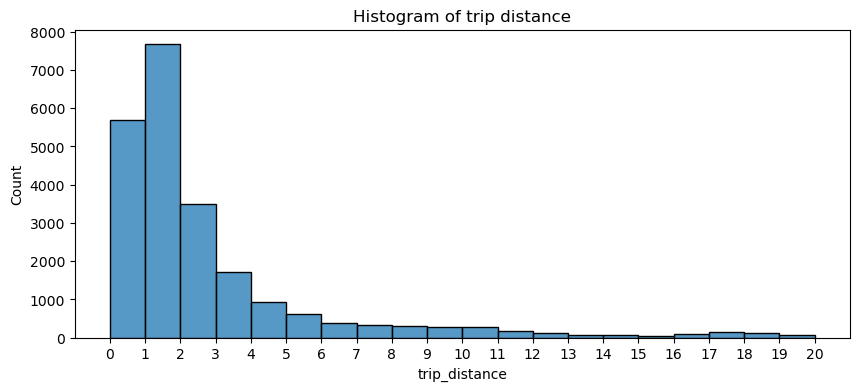

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='trip_distance', bins=range(0, 21, 1))
plt.xticks(range(0,21,1))
plt.title('Histogram of trip distance');

In [16]:
data['extra'].unique()

array([ 0. ,  0.5,  1. , -0.5,  4.5, -1. ])

- The `extra` column allows for value of 0, 0.5, & 1 only. Therefore, the values of -0.5, 4.5, & -1 can be invested further to understand the data.

In [17]:
data['extra'].value_counts()

 0.0    11921
 0.5     7104
 1.0     3564
 4.5      101
-0.5        7
-1.0        2
Name: extra, dtype: int64

- The value of -0.5 & -1.0 could be a typo error, therefore can be corrected.
- The value of 4.5 could also be an error that should be corrected. Otherwise, it will be dropped pending an explanation.

- Data validation can be done to ensure the values inputted here are either 0, 0.5, or 1 only.

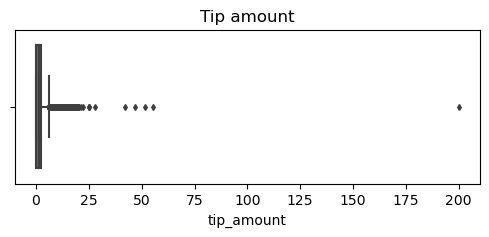

In [18]:
# Checking the distributon of tip amount
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='tip_amount', fliersize=3)
plt.title('Tip amount');

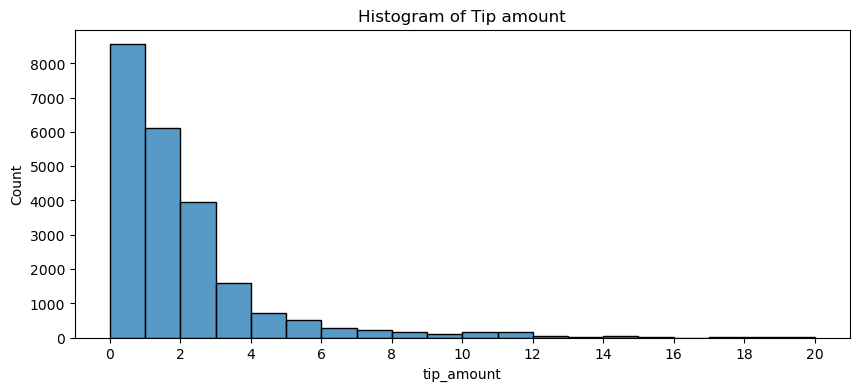

In [19]:
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='tip_amount', bins=range(0, 21, 1))
plt.xticks(range(0, 21, 2))
plt.title('Histogram of Tip amount');

- The data is right skewed.

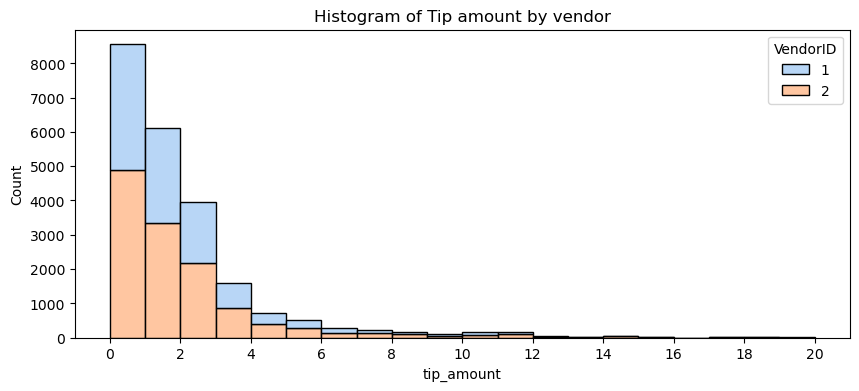

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='tip_amount', bins=range(0, 21, 1),
            hue='VendorID', multiple='stack', palette='pastel')
plt.xticks(range(0, 21, 2))
plt.title('Histogram of Tip amount by vendor');

- Vendor 2 has a slightly higher proportion than vendor 1 and this proportion was maintained evenly.

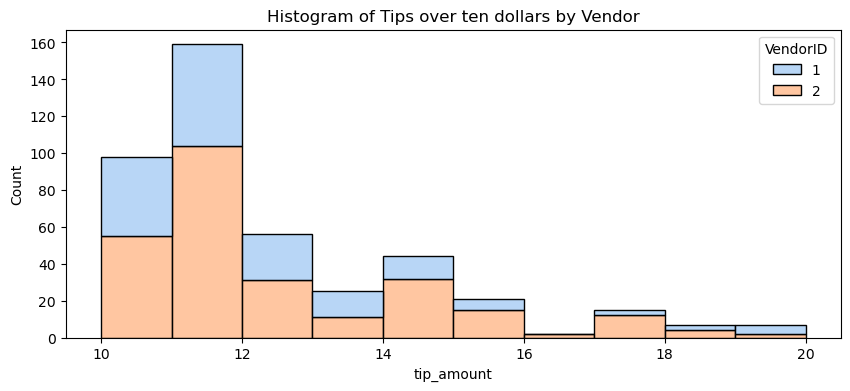

In [21]:
#Checking the proportion for higher tips over 10 dollars
tips_over_ten = data[data['tip_amount'] > 10]

plt.figure(figsize=(10,4))
sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10, 21, 1),
            hue='VendorID', multiple='stack', palette='pastel')
plt.xticks(range(10, 21, 2))
plt.title('Histogram of Tips over ten dollars by Vendor');

- With the exception of the extreme, the proportion of the vendors was maintained.

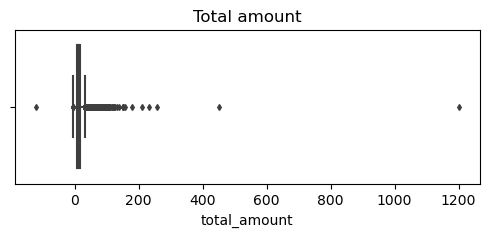

In [22]:
# Checking the distributon of total amount
plt.figure(figsize=(6,2))
sns.boxplot(data=data, x='total_amount', fliersize=3)
plt.title('Total amount');

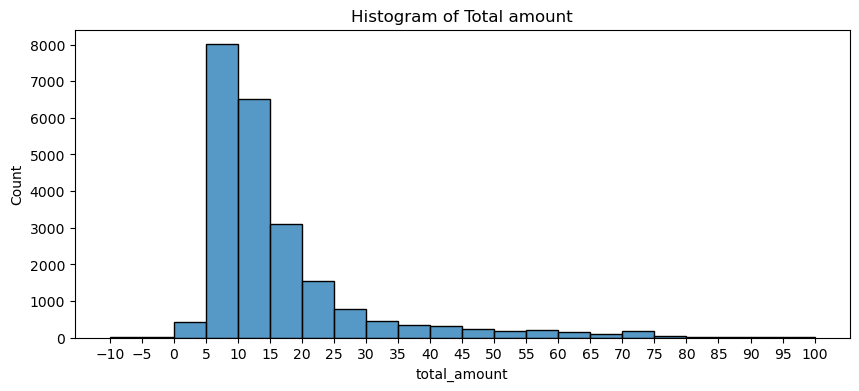

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(data=data, x='total_amount', bins=range(-10, 101, 5))
plt.xticks(range(-10,101,5))
plt.title('Histogram of Total amount');

In [24]:
# Checking the representation of VendorID in our data
data['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [25]:
# Calculating the average total amount of each vendor
data.groupby('VendorID').mean(numeric_only=True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


In [26]:
# Checking the representation of payment type in our data
data['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [27]:
# Calculating the average total amount of each payment type
data.groupby('payment_type').mean(numeric_only=True)[['tip_amount']]

,tip_amount
payment_type,
1,2.7298
2,0.0000
3,0.0000
4,0.0000


- Only credit card tip amount is represented in this data.

In [28]:
# Checking the representation of passenger count in our data
data['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

- Nearly two-third of the rides were single passengers
- Approximately 700 rides had 6 passengers
- 33 rides had zero passengers which doesn't make sense. This will be dropped unless a reasonable explanation can be found.

In [29]:
# Filtering credit card data
credit_card_data = data[data['payment_type'] == 1]

In [30]:
# Checking the representation of passenger count with credit card payment type in our data
credit_card_data['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

- Single passenger ride remains the highest representation in the data.

In [31]:
# Calculating the average credit card tip amount of each passenger count
avg_passenger_count_tip = credit_card_data.groupby('passenger_count').mean(numeric_only=True)[['tip_amount']]
avg_passenger_count_tip

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


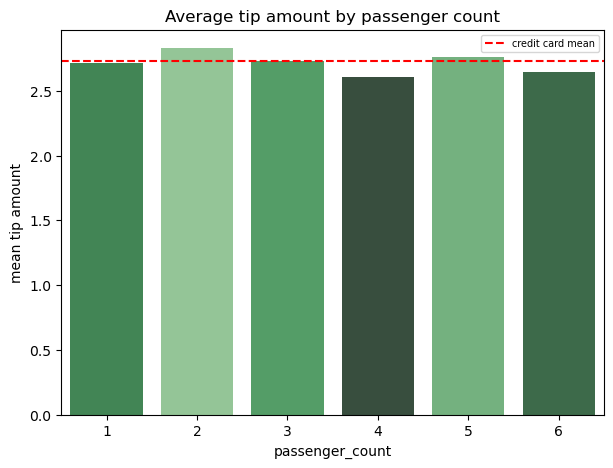

In [32]:
# Plotting average credit card tip amount by passenger count
plt.figure(figsize=(7,5))
plot_data = avg_passenger_count_tip.tail(-1)
pal = sns.color_palette("Greens_d", len(plot_data))
rank = plot_data['tip_amount'].argsort().argsort()

sns.barplot(data=plot_data, x=plot_data.index,
                 y='tip_amount', palette=np.array(pal[::-1])[rank])
plt.axhline(credit_card_data['tip_amount'].mean(), ls='--', color='r', label='credit card mean')
plt.legend(loc='upper right', fontsize=7)
plt.ylabel('mean tip amount')
plt.title('Average tip amount by passenger count');

No noticeabe change in mean tip amount across passenger count.

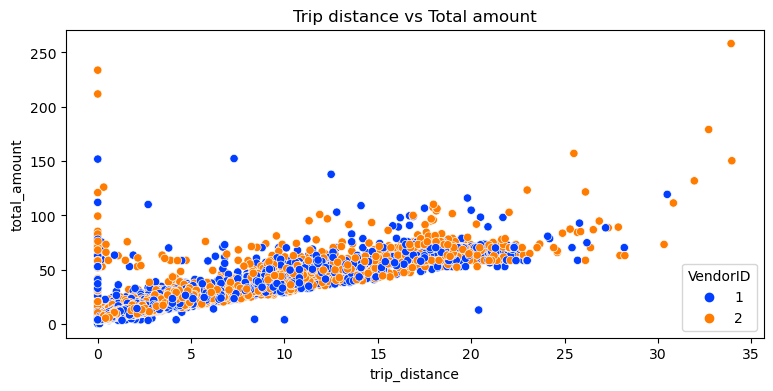

In [33]:
# Plotting trip distance vs total amount without outliers
plt.figure(figsize=(9,4))
plot_data=data[(data['total_amount']<400) & (data['total_amount']>0)]
sns.scatterplot(data=plot_data, x='trip_distance', y='total_amount',
               hue='VendorID', palette='bright')
plt.title('Trip distance vs Total amount');

- It is clear that as trip distance increases, total amount also increases.
- It is unusual that trip with 0 miles recorded increasing fare amount with vendor 2 having the highest amount.

In [34]:
zero_trip_distance = data[data['trip_distance']==0]
zero_trip_distance['total_amount'].sort_values(ascending=False)

20312    450.30
12511    233.74
15474    211.80
11269    151.82
7281     120.96
          ...  
14283      0.31
5722       0.00
10506      0.00
22566      0.00
10281     -4.30
Name: total_amount, Length: 148, dtype: float64

### Feature engineering

In [35]:
data['month'] = data['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
data['day'] = data['tpep_pickup_datetime'].dt.day_name().str.lower()

In [36]:
# Getting total number of rides per month
monthly_rides = data['month'].value_counts()
monthly_rides

mar    2049
oct    2027
apr    2019
may    2013
jan    1997
jun    1964
dec    1863
nov    1843
feb    1769
sep    1734
aug    1724
jul    1697
Name: month, dtype: int64

In [37]:
# Reordering the month to calender order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

jan    1997
feb    1769
mar    2049
apr    2019
may    2013
jun    1964
jul    1697
aug    1724
sep    1734
oct    2027
nov    1843
dec    1863
Name: month, dtype: int64

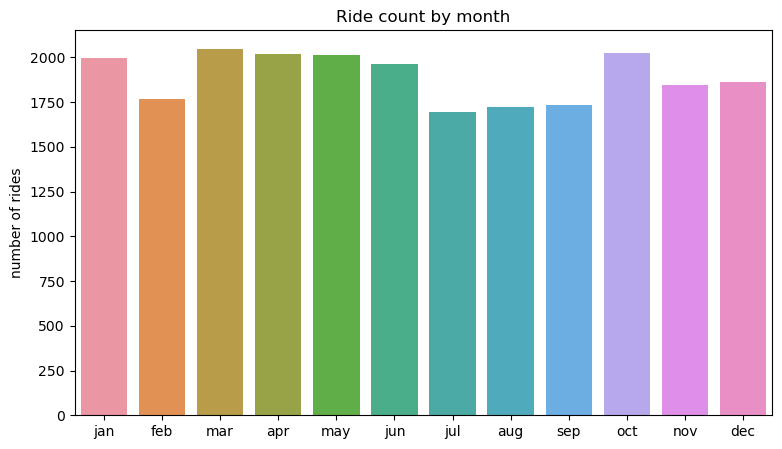

In [38]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_ylabel('number of rides')
ax.set_xticklabels(month_order, fontsize=10)
ax.set_title('Ride count by month');

- Rides are fairly consistent with noticeable drop during summer months of July, August, September, and also February.

In [39]:
# Getting total number of rides per day
daily_rides = data['day'].value_counts()
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

monday       2931
tuesday      3198
wednesday    3390
thursday     3402
friday       3413
saturday     3367
sunday       2998
Name: day, dtype: int64

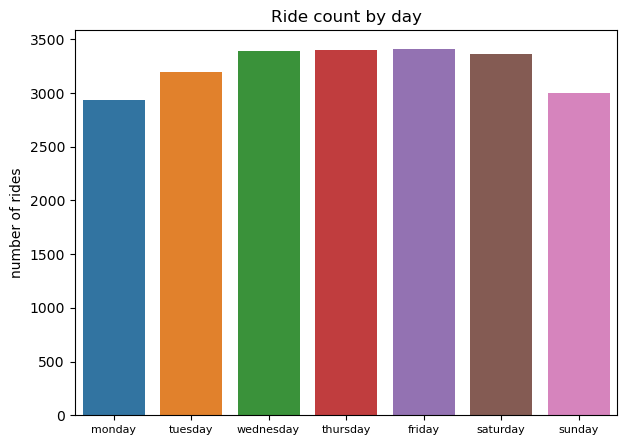

In [40]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_ylabel('number of rides')
ax.set_xticklabels(day_order, fontsize=8)
ax.set_title('Ride count by day');

- Surprisingly, Monday has a lower count as Sunday
- Wednesday through to saturday have higher ride count.
- Thursday has the highest ride count

In [41]:
# Calculating total revenue by day
total_amount_day = data.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
monday,49574.37
tuesday,52527.14
wednesday,55310.47
thursday,57181.91
friday,55818.74
saturday,51195.40
sunday,48624.06


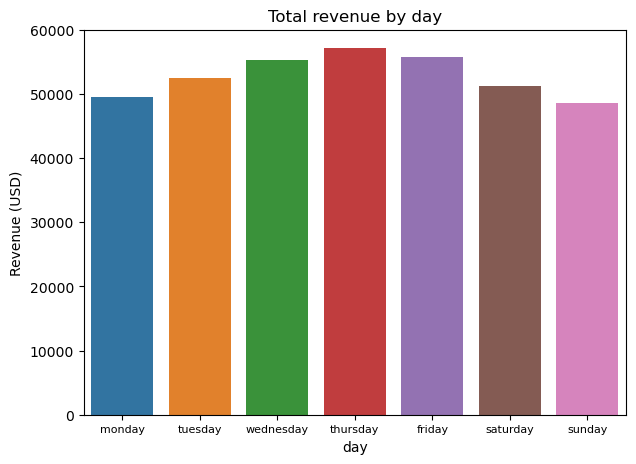

In [42]:
# Bar plot of total revenue by day
plt.figure(figsize=(7,5))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order, fontsize=8)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day');

- Thursday has the highest revenue
- Monday and Sunday have the lowest revenue
- Interesting to note that Saturday have 35 fewer rides than Thursday, however, the revenue difference is ~ $6,000 &mdash; more than a 10% drop


In [43]:
# Calculating total revenue by month
total_amount_month = data.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
jan,31735.25
feb,28937.89
mar,33085.89
apr,32012.54
may,33828.58
jun,32920.52
jul,26617.64
aug,27759.56
sep,28206.38


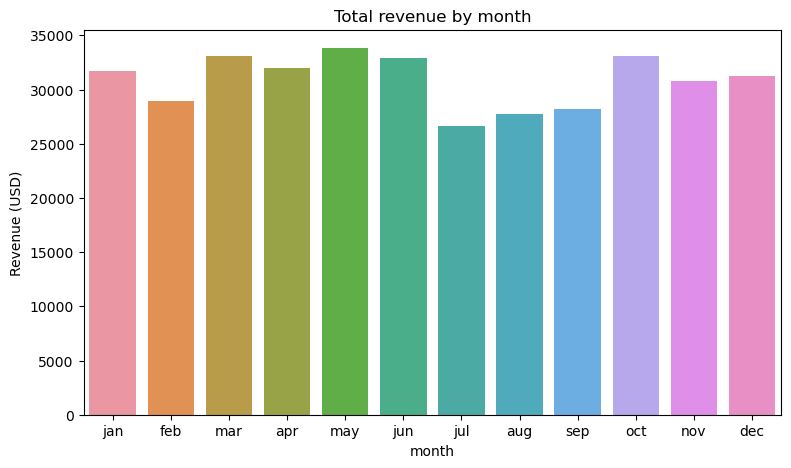

In [44]:
# Bar plot of total revenue by day
plt.figure(figsize=(9,5))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
ax.set_xticklabels(month_order, fontsize=10)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month');

- Similar to ride count by month, noticeable dip during summer months and February.

In [45]:
# Checking number of unique drop off locations
data['DOLocationID'].nunique()

216

In [46]:
# Getting mean trip distance to drop off locations
dropoff_distance = data.groupby(['DOLocationID']).mean(numeric_only=True)[['trip_distance']]
dropoff_distance = dropoff_distance.sort_values(by='trip_distance')
dropoff_distance

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


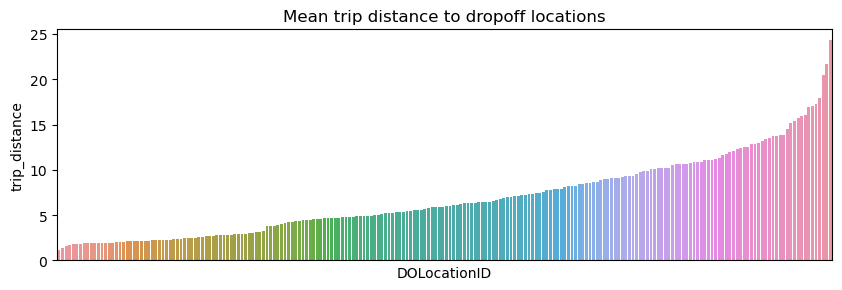

In [47]:
plt.figure(figsize=(10,3))
ax = sns.barplot(x=dropoff_distance.index, y=dropoff_distance['trip_distance'],
                order=dropoff_distance.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance to dropoff locations');

- This indicates the drop off point are relatively evenly distributed across the terrain.

In [48]:
# Checking to see if the drop off locations ID are consecutively numbered
data['DOLocationID'].max() - len(set(data['DOLocationID']))

49

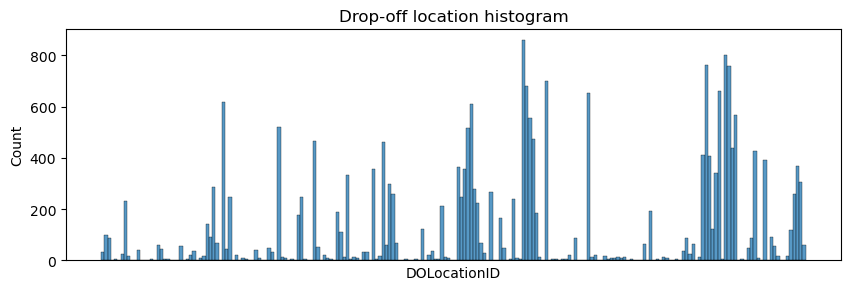

In [49]:
# Plotting histogram of dropoff locations
plt.figure(figsize=(10,3))

# transforming data to string so that there are no gaps in the histogram
plot_data = data['DOLocationID'].sort_values()

# converting from numeric to string data type
plot_data = plot_data.astype('str')

ax = sns.histplot(x=plot_data)
ax.set_xticks([])
plt.title('Drop-off location histogram');

- Only a few of the locations have majority of traffic out of the 200+ locations. With complete information (not in our dataset) like the name of the corresponding location ID, we can know for sure why these locations recieve majority of the traffic.

## Hypothesis testing, A/B test

In [50]:
from scipy import stats

The goal is to conduct two sampe t-test

$H_0$: There is no difference in average fare between customers who use credit cards and customers who use cash. 

$H_A$: There is a difference in average fare between customers who use credit cards and customers who use cash

Significance level : 5% or 0.05

In [51]:
# Filtering data needed to find p-value
credit_card = data[data['payment_type'] == 1]['fare_amount']
cash = data[data['payment_type'] == 2]['fare_amount']

# Finding p-value
stats.ttest_ind(a=credit_card, 
                b=cash, 
                equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

- Since the p-value is less than the significance level, we fail to accept the null hypothesis.
- There is a statistical significant difference in average fare between customers who pay with credit card and customers who pay with cash.

**Assumption for the t-test**
- Passengers were forced to pay with either cash or credit card and they complied.
- The data was collected seperated

#### Insight
1. Encouraging passengers to pay with credit card will generate more revenue for taxi cab drivers.
2. Passengers with little cash are more likely to pay with card for longer trips. Hence, it is more likely that `fare amount` determines `payment type` and not vice versa.

### Regression analysis: Linear regression

In order to perform linear regression, outliers earlier found will be dealt with and more feature engineering will be performed on the data.

In [52]:
# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [53]:
# Duration in minutes
data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'])/np.timedelta64(1, 'm')
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667


To check for outlier, we will focus on the following features;
- trip distance
- fare amount
- duration

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

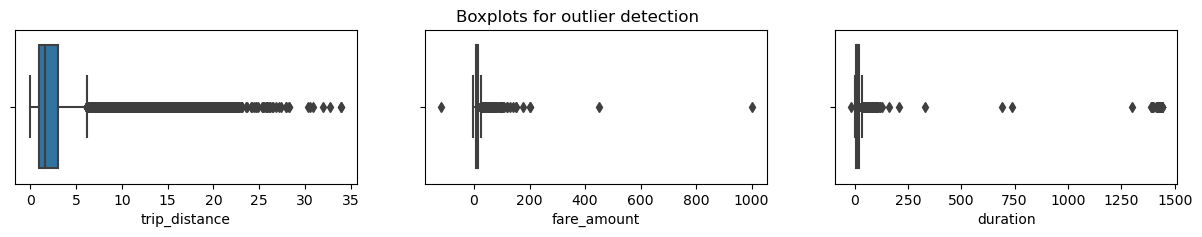

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=data['trip_distance'])
sns.boxplot(ax=axes[1], x=data['fare_amount'])
sns.boxplot(ax=axes[2], x=data['duration'])
plt.show();

In [56]:
data[['trip_distance', 'fare_amount', 'duration']].describe()

,trip_distance,fare_amount,duration
count,22699.000000,22699.000000,22699.000000
mean,2.913313,13.026629,17.013777
std,3.653171,13.243791,61.996482
min,0.000000,-120.000000,-16.983333
25%,0.990000,6.500000,6.650000
50%,1.610000,9.500000,11.183333
75%,3.060000,14.500000,18.383333
max,33.960000,999.990000,1439.550000


#### Outlier imputation

In [57]:
# Trip distance outlier
sorted(set(data['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [58]:
sum(data['trip_distance']==0)

148

- Trip distance of zero coud be trip that got canceled by the passenger
- The total number of zero trip distance is an insignificant portion of the data, hence, can be left untouched.

In [59]:
# Copying the data that changes will be effected upon
df = data.copy()

In [60]:
# Defining a function
def outlier_imputer(column_list:str, iqr_factor:float):
    '''
    outlier_imputer will reassign upper limit to outlier value
    Arguments:
        column_list: The list of values to itrate over
        iqr_factor: used to determine maximum threshold beyond which a value is considered an outlier.
                    represent x in the formula Q3 + (x * IQR)
    '''
    
    for col in column_list:
        # Reassigning minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculating upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassigning values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())

##### Fare amount outlier

In [61]:
# Fare amount outlier
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

In [62]:
# Calculating upper threshold
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1
upper_threshold = q3 + (7 * iqr)

print('fare_amount')
print('IQR:', iqr)
print('upper_threshold:', upper_threshold)
print()

# Reassigning values > threshold to threshold
df.loc[df['fare_amount'] > upper_threshold, 'fare_amount'] = upper_threshold
print(df["fare_amount"].describe())

fare_amount
IQR: 8.0
upper_threshold: 70.5

count    22699.000000
mean        12.921383
std         10.659110
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         70.500000
Name: fare_amount, dtype: float64


According to research, a trip distance of 34miles in New York city is ~$68

##### Duration outlier

In [63]:
# Duration outlier
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [64]:
# Calculating upper threshold
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1
upper_threshold = q3 + (7 * iqr)

print('duration')
print('IQR:', iqr)
print('upper_threshold:', upper_threshold)
print()

# Reassigning values > threshold to threshold
df.loc[df['duration'] > upper_threshold, 'duration'] = upper_threshold
print(df["duration"].describe())

duration
IQR: 11.733333333333333
upper_threshold: 100.51666666666665

count    22699.000000
mean        14.493595
std         12.166165
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max        100.516667
Name: duration, dtype: float64


According to research, average duration will be 145 minutes at an average speed is 14MPH

##### Feature engineering: creating `rush hour` column

Creating a rush hour feature or column. Rush hour is defined as;
- any weekday except saturday and sunday
- from 06:00 - 10:00 AND 16:00 -20:00

In [65]:
# Creating rush hour column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# Reassigning saturday and sunday to 0
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [66]:
# Defining a function to convert rush hour to binary
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [67]:
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,0


##### Feature engineering: creating `mean distance` column

In [68]:
# Creating new column `pickup_dropoff`
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [69]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [70]:
# Converting `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# Reassigning to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [71]:
# Creating a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Mapping `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirming that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


##### Feature engineering: creating `mean duration` column

In [72]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


##### Scatter plot
To visualize the relationship between mean duration and fare amount

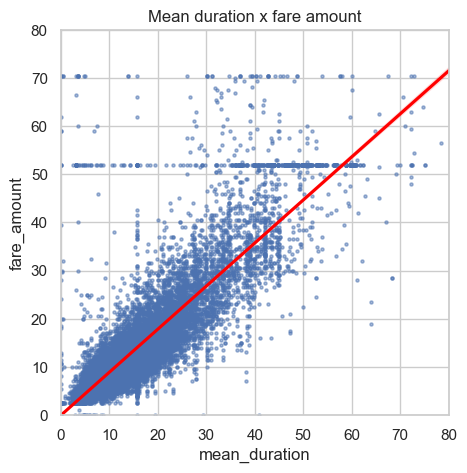

In [73]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 80)
plt.xlim(0, 80)
plt.title('Mean duration x fare amount')
plt.show()

- The mean duration variable correlates with the target variable (fare amount). 
- The horizontal line at 70.5 dollars represent the maximum value for all former outliers.
- The horizontal line at 52 dollars needs to be investigated further.

In [74]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
70.5     53
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [75]:
# Examining the first 30 of this trips
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour,pickup_dropoff,mean_distance,mean_duration
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,36.800000,0,236 132,19.211667,42.455556
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,66.850000,0,132 163,19.229000,52.941667
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0.966667,0,132 132,2.255862,3.021839
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,29.183333,0,132 79,19.431667,47.275000
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,29.483333,0,132 234,17.654000,49.833333
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,39.833333,1,132 48,18.761905,58.804762
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,15.616667,0,228 88,4.730000,15.616667
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,45.450000,0,132 48,18.761905,58.804762
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,42.850000,0,186 132,17.096000,42.920000
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,71.583333,0,132 148,17.994286,46.340476



It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.


The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

In [76]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,0,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,0,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,1,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,0,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,0,4 112,4.435000,14.616667


##### Isolating modeling variables

In [77]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   mean_distance    22699 non-null  float64
 5   mean_duration    22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


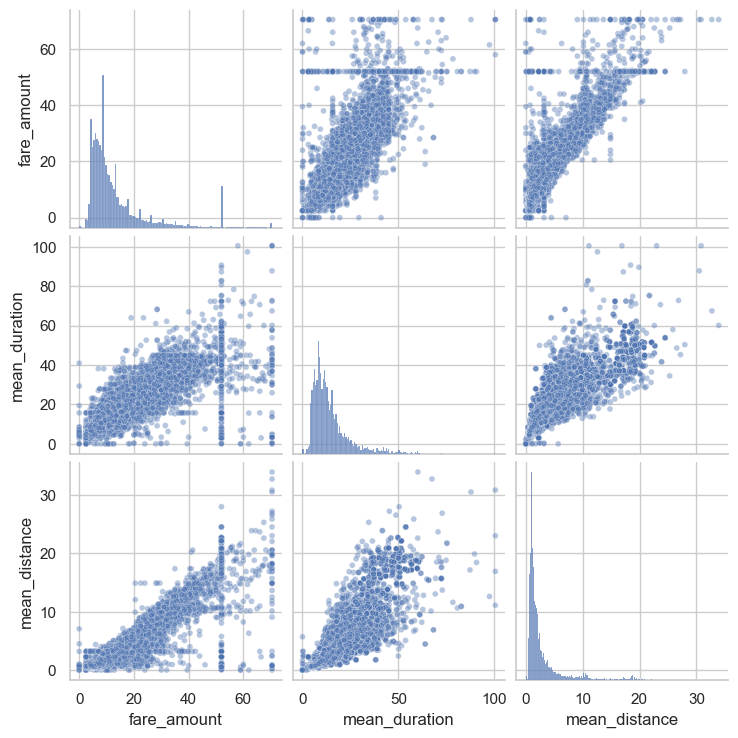

In [78]:
# Creating a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

These variables all show linear correlation with each other

In [79]:
# Creating correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,rush_hour,mean_distance,mean_duration
VendorID,1.000000,0.266463,0.001245,-0.002874,0.004741,0.002061
passenger_count,0.266463,1.000000,0.014981,-0.022035,0.013428,0.015818
fare_amount,0.001245,0.014981,1.000000,-0.019940,0.907915,0.852109
rush_hour,-0.002874,-0.022035,-0.019940,1.000000,-0.039725,-0.021258
mean_distance,0.004741,0.013428,0.907915,-0.039725,1.000000,0.872415
mean_duration,0.002061,0.015818,0.852109,-0.021258,0.872415,1.000000


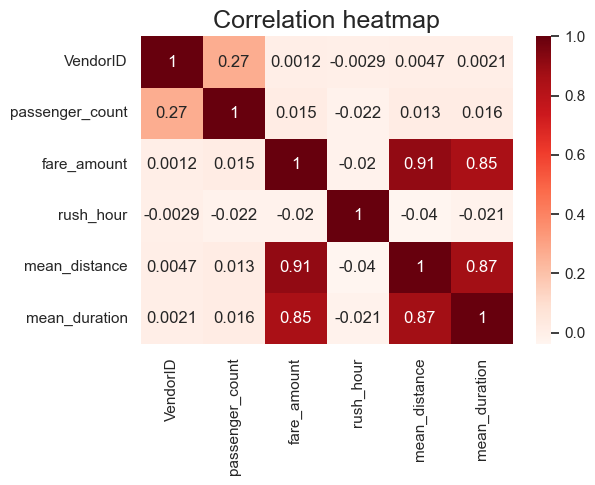

In [80]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

 `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.79.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, modeling with both variables even though they are correlated is viable.

##### Splitting the data

In [81]:
# Removing the target column from the features
X = df2.drop(columns=['fare_amount'])

# Setting y variable
y = df2[['fare_amount']]

# Displaying first few rows
X.head()

,VendorID,passenger_count,rush_hour,mean_distance,mean_duration
0,2,6,0,3.521667,22.847222
1,1,1,0,3.108889,24.470370
2,1,1,1,0.881429,7.250000
3,2,1,0,3.700000,30.250000
4,2,1,0,4.435000,14.616667


##### Pre-process data: Dummy encoding categorical column

In [82]:
# Converting VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,rush_hour,mean_distance,mean_duration,VendorID_2
0,6,0,3.521667,22.847222,1
1,1,0,3.108889,24.470370,0
2,1,1,0.881429,7.250000,0
3,1,0,3.700000,30.250000,1
4,1,0,4.435000,14.616667,1


##### Slitting data into training and test sets

In [83]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Standardizing the data

In [84]:
# Standardizing the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524 -0.64893329  0.8694684   0.17162685  0.89286563]
 [-0.50301524  1.54099045 -0.60011281 -0.69615542  0.89286563]
 [ 0.27331093 -0.64893329 -0.47829156 -0.57183561 -1.11998936]
 ...
 [-0.50301524 -0.64893329 -0.45121122 -0.67689946 -1.11998936]
 [-0.50301524  1.54099045 -0.58944763 -0.85407978 -1.11998936]
 [ 1.82596329 -0.64893329  0.83673851  1.12027841  0.89286563]]


##### Linear regression model fitting

In [85]:
# Fitting the model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Model Evaluation

In [86]:
# Evaluating the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8338102954780648
R^2: 0.8338102954780648
MAE: 2.213345390566037
MSE: 18.98771020693099
RMSE: 4.35748897955359


In [87]:
# Scaling the X_test data
X_test_scaled = scaler.transform(X_test)

In [88]:
# Evaluating the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)

y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.863169483901161
R^2: 0.863169483901161
MAE: 2.1555533993607785
MSE: 15.19430835247079
RMSE: 3.8979877311852573


The model performance is high on both training and test sets, suggesting that there is no bias in the model and that the model is not overfit. In fact, the test scores are somewhat better.

For the test data, an R<sup>2</sup> of 0.855 means that 85.5% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

#### Results

In [89]:
# Creating a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.385425,1.614575
18134,28.0,16.230854,11.769146
4655,5.5,6.734646,-1.234646
7378,15.5,16.325531,-0.825531
13914,9.5,10.518533,-1.018533


##### Visualizing model results and checking assumptions

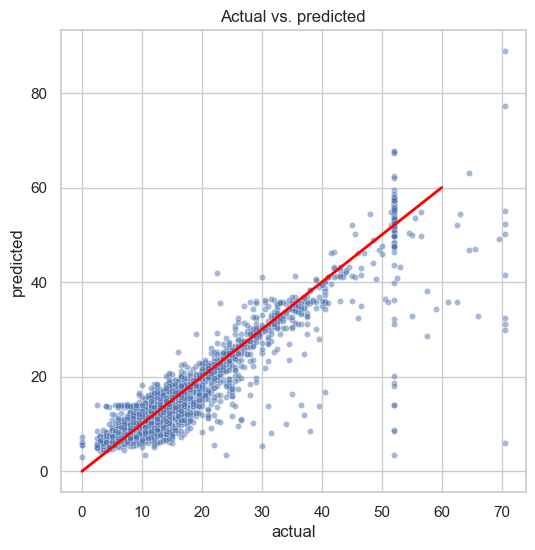

In [90]:
# Creating a scatterplot to visualize `predicted` over `actual`

fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

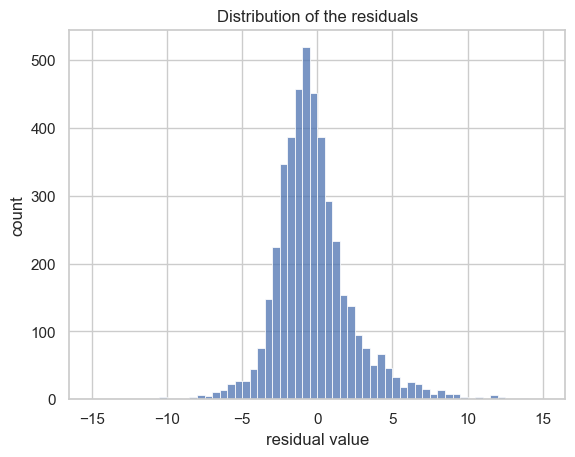

In [91]:
# Visualizing the distribution of the `residuals`

sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [92]:
results['residual'].mean()

-0.01707680659612025

The distribution of the residuals is normal and has a mean of 0.017. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the models errors are evenly distributed and unbiased.

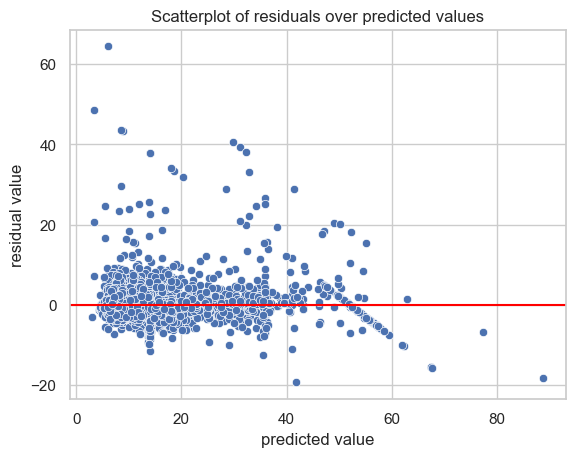

In [93]:
# Creating a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which are the imputed maximum of \\$70.50 and the flat rate of \\$52 for JFK airport trips.

#### Model coefficients

In [94]:
# Getting model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,rush_hour,mean_distance,mean_duration,VendorID_2
0,0.031701,0.11481,7.3466,2.67191,-0.052452


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. This means controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$8.52. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

Next, we translate this back to miles instead of standard deviation (i.e., unscale the data). 


In [95]:
# Calculating SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# Dividing the model coefficient by the standard deviation
print(8.516325 / X_train['mean_distance'].std())

3.574812975256415
2.3823134409959277


**Linear regression model coefficient interpretation**  
For every 3.57 miles traveled, the fare increased by a mean of \\$8.52. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.38.

 #### Note
This next steps isn't reflective of real world scenario but for the purpose of building a machine learning algorithm in this notebook.

##### Predicting on full dataset

In [96]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

##### Imputing `RatecodeID` 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.

The other rate codes are not a fixed rate, so these fares will remain untouched.

We Impute `52` at all predictions where `RatecodeID` is `2`.

In [97]:
# Creating a new dataframe containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Adding a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Imputing prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [98]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8844808992228573
MAE: 2.0144811395084607
MSE: 13.12431343070179
RMSE: 3.622749429742801


In [99]:
# Combining means' columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.353907
1,24.470370,3.108889,15.914232
2,7.250000,0.881429,7.067040
3,30.250000,3.700000,18.540796
4,14.616667,4.435000,15.947143


##### Saving as csv file

In [100]:
nyc_preds_means.to_csv('nyc_preds_means.csv', index=False)

#### Post-Script
1. The regression analysis is guilty of data leakage because the mean distance and mean duration was calculated from the whole dataset.
2. Since the fare amount for `RatecodeID` 2 is fixed and does not need predicting, it is best to filter out before training the model.
3. This model predicts values for building machine learning model.

### Machine Learning Model Development
##### Model Objective: Predict passengers who will not leave a tip

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [102]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,0,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,0,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,1,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,0,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,0,4 112,4.435000,14.616667


In [103]:
df0 = pd.read_csv('nyc_preds_means.csv')
df0.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.353907
1,24.470370,3.108889,15.914232
2,7.250000,0.881429,7.067040
3,30.250000,3.700000,18.540796
4,14.616667,4.435000,15.947143


In [104]:
df0 = df.merge(df0['predicted_fare'],
                left_index=True,
                right_index=True)

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour,pickup_dropoff,mean_distance,mean_duration,predicted_fare
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,0,100 231,3.521667,22.847222,16.353907
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,0,186 43,3.108889,24.470370,15.914232
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,1,262 236,0.881429,7.250000,7.067040
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,0,188 97,3.700000,30.250000,18.540796
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,0,4 112,4.435000,14.616667,15.947143


In [105]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Recall that only credit card payment passengers leave a tip. hence, we filter our data to reflecct credit card passengers.

In [106]:
# Subsetting the data to contain only credit card customers
df1 = df0[df0['payment_type']==1].copy()

Next, we engineer target feature for the model

$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$

##### Feature engineering

In [107]:
# Creating tip percent column
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)
df1.tip_percent.head()

0    0.200
1    0.238
2    0.199
3    0.300
5    0.200
Name: tip_percent, dtype: float64

In [108]:
# Creating a generous column
df1['generous'] = df1['tip_percent'].copy()
df1['generous'] = (df1['generous'] >= 0.2).astype(int)
df1['generous'].head()

0    1
1    1
2    0
3    1
5    1
Name: generous, dtype: int32

Next, engineering four new columns that represent time of day bins. Each column will contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [109]:
# Creating 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Creating 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Creating 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Creating 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [110]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour,pickup_dropoff,mean_distance,mean_duration,predicted_fare,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,0,100 231,3.521667,22.847222,16.353907,0.200,1,8,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,0,186 43,3.108889,24.470370,15.914232,0.238,1,14,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,1,262 236,0.881429,7.250000,7.067040,0.199,0,7,7,7,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,0,188 97,3.700000,30.250000,18.540796,0.300,1,13,13,13,13
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,mar,saturday,8.000000,0,161 236,2.052258,11.855376,10.448369,0.200,1,20,20,20,20


In [111]:
# Converting to binary values
df1['am_rush'] = np.where(((df1['am_rush'] >= 6) & (df1['am_rush'] < 10)), 1, 0)
df1['daytime'] = np.where(((df1['daytime'] >= 10) & (df1['daytime'] < 16)), 1, 0)
df1['pm_rush'] = np.where(((df1['pm_rush'] >= 16) & (df1['pm_rush'] < 20)), 1, 0)

In [112]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [113]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

In [114]:
df1.head() 

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,rush_hour,pickup_dropoff,mean_distance,mean_duration,predicted_fare,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,0,100 231,3.521667,22.847222,16.353907,0.200,1,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,0,186 43,3.108889,24.470370,15.914232,0.238,1,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,1,262 236,0.881429,7.250000,7.067040,0.199,0,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,0,188 97,3.700000,30.250000,18.540796,0.300,1,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,mar,saturday,8.000000,0,161 236,2.052258,11.855376,10.448369,0.200,1,0,0,0,1


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15265 non-null  int64         
 1   VendorID               15265 non-null  int64         
 2   tpep_pickup_datetime   15265 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  15265 non-null  datetime64[ns]
 4   passenger_count        15265 non-null  int64         
 5   trip_distance          15265 non-null  float64       
 6   RatecodeID             15265 non-null  int64         
 7   store_and_fwd_flag     15265 non-null  object        
 8   PULocationID           15265 non-null  int64         
 9   DOLocationID           15265 non-null  int64         
 10  payment_type           15265 non-null  int64         
 11  fare_amount            15265 non-null  float64       
 12  extra                  15265 non-null  float64       
 13  m

In [116]:
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'trip_distance', 'store_and_fwd_flag', 'payment_type', 'fare_amount',
             'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
             'total_amount', 'duration', 'rush_hour', 'pickup_dropoff', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   month            15265 non-null  object 
 6   day              15265 non-null  object 
 7   mean_distance    15265 non-null  float64
 8   mean_duration    15265 non-null  float64
 9   predicted_fare   15265 non-null  float64
 10  generous         15265 non-null  int32  
 11  am_rush          15265 non-null  int32  
 12  daytime          15265 non-null  int32  
 13  pm_rush          15265 non-null  int32  
 14  nighttime        15265 non-null  int64  
dtypes: float64(3), int32(4), int64(6), object(2)
memory usage: 1.6+ MB


##### Variable encoding

Converting numerical columns that contain categorical information.

In [117]:
# Defining list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# Converting each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')

In [118]:
# Converting categoricals to binary
df1 = pd.get_dummies(df1, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to day_wednesday
dtypes: float64(3), int32(4), int64(2), uint8(338)
memory usage: 5.9 MB


In [119]:
# Getting class balance of 'generous' col
df1['generous'].value_counts(normalize=True)

1    0.526368
0    0.473632
Name: generous, dtype: float64

The dataset is nearly balanced.

**Determining evaluation metric for model**
Considering the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

Since the stake are relatively even, we will use **F1 score** to evaluate the model.

### Modeling

##### splitting data

In [120]:
# Isolate target variable (y)
y = df1['generous']

# Isolate the features (X)
X = df1.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#### Random forest model

In [121]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')